In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Display float values with 3 decimals
pd.set_option('display.float_format', lambda x: f'{x:.3f}')


In [3]:
# Load the CSV dataset into a pandas DataFrame
# Replace 'your_data.csv' with the correct path or filename
df = pd.read_csv('../data/cleaned_insurance_data.csv')

# Preview the first few rows of the dataset
df.head()


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,mmcode_was_missing,make_was_missing,Model_was_missing,bodytype_was_missing,NumberOfDoors_was_missing,VehicleIntroDate_was_missing,Cylinders_was_missing,cubiccapacity_was_missing,kilowatts_was_missing,LossRatio
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,0,0,0,0,0,0,0,0,0,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,0,0,0,0,0,0,0,0,0,0.0
2,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,0,0,0,0,0,0,0,0,0,0.0
3,145247,12827,2015-01-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,0,0,0,0,0,0,0,0,0,0.0
4,145247,12827,2015-04-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,0,0,0,0,0,0,0,0,0,0.0


In [39]:
# Claim Frequency = Num policies with at least one claim / total policies
# Claim Severity = Average claim amount for customers who had at least one claim
# Margin = TotalPremium - TotalClaims

# Ensure the columns exist: 'HasClaim', 'ClaimAmount', 'TotalPremium', 'TotalClaims', 'Gender', 'Province', 'ZipCode'

# Add derived metrics
df['Margin'] = df['TotalPremium'] - df['TotalClaims']
df['HasClaim'] = df['TotalClaims'] > 0


In [14]:
# Recalculate LossRatio safely to avoid division by zero
df['LossRatio'] = np.where(
    df['TotalPremium'] != 0,
    df['TotalClaims'] / df['TotalPremium'],
    0
)


In [23]:
df['TotalClaims'].tolist()
df['TotalClaims'].describe()



count    618176.000000
mean        100.413265
std        2989.980798
min      -12002.412281
25%           0.000000
50%           0.000000
75%           0.000000
max      393092.105263
Name: TotalClaims, dtype: float64

In [24]:
df['TotalClaims'].value_counts()

TotalClaims
0.000000        615533
6140.350877        304
750.649123          98
1300.000000         58
877.192982          45
                 ...  
42815.175439         1
28628.947368         1
8392.236842          1
48369.385965         1
14867.500000         1
Name: count, Length: 1530, dtype: int64

In [28]:
df['Gender'].describe()

count            613555
unique                3
top       Not specified
freq             591068
Name: Gender, dtype: object

In [7]:
# Select relevant columns for the analysis
# Drop any rows where essential data (Province, Premium, Claims, LossRatio) is missing
df_clean = df[['Province', 'TotalPremium', 'TotalClaims', 'LossRatio']].dropna()

# Remove rows with empty Province values
df_clean = df_clean[df_clean['Province'] != '']

# Create a new column to calculate profit margin: Premium - Claims
df_clean['Margin'] = df_clean['TotalPremium'] - df_clean['TotalClaims']

# Preview cleaned dataset
df_clean.head(350)


,Province,TotalPremium,TotalClaims,LossRatio,Margin
0,Gauteng,21.929825,0.0,0.0,21.929825
1,Gauteng,21.929825,0.0,0.0,21.929825
2,Gauteng,512.848070,0.0,0.0,512.848070
3,Gauteng,3.256435,0.0,0.0,3.256435
4,Gauteng,50.474737,0.0,0.0,50.474737
...,...,...,...,...,...
345,Gauteng,1.540883,0.0,0.0,1.540883
346,Gauteng,2.076842,0.0,0.0,2.076842
347,Gauteng,2.076842,0.0,0.0,2.076842
348,Gauteng,21.929825,0.0,0.0,21.929825


In [8]:
# Count the number of records per province to select two with sufficient data
df_clean['Province'].value_counts()


Province
Gauteng          240782
KwaZulu-Natal    111896
Western Cape      96758
North West        89799
Mpumalanga        31663
Eastern Cape      19694
Limpopo           18009
Free State         5932
Northern Cape      3643
Name: count, dtype: int64

In [11]:
# Filter the dataset for two specific provinces to compare
group_a = df_clean[df_clean['Province'] == 'Gauteng']
group_b = df_clean[df_clean['Province'] == 'KwaZulu-Natal']


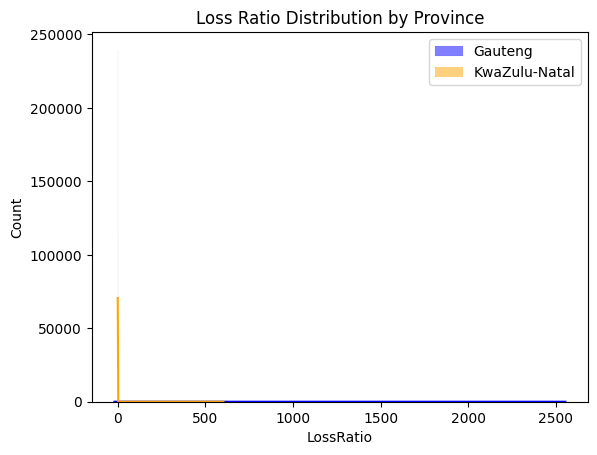

In [13]:
# Plot the distribution of LossRatio for both provinces
sns.histplot(group_a['LossRatio'], color='blue', label='Gauteng', kde=True)
sns.histplot(group_b['LossRatio'], color='orange', label='KwaZulu-Natal', kde=True)
plt.legend()
plt.title('Loss Ratio Distribution by Province')
plt.show()


In [29]:
# Conduct an independent t-test to determine if LossRatio differs significantly
t_stat, p_val = stats.ttest_ind(group_a['LossRatio'], group_b['LossRatio'], equal_var=False)

# Display t-statistic and p-value
print(f'T-statistic: {t_stat:.3f}, p-value: {p_val:.5f}')


T-statistic: 6.004, p-value: 0.00000


C:\Users\Bob\AppData\Local\Temp\ipykernel_11392\3710556466.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Group', y='LossRatio', palette='Set2')


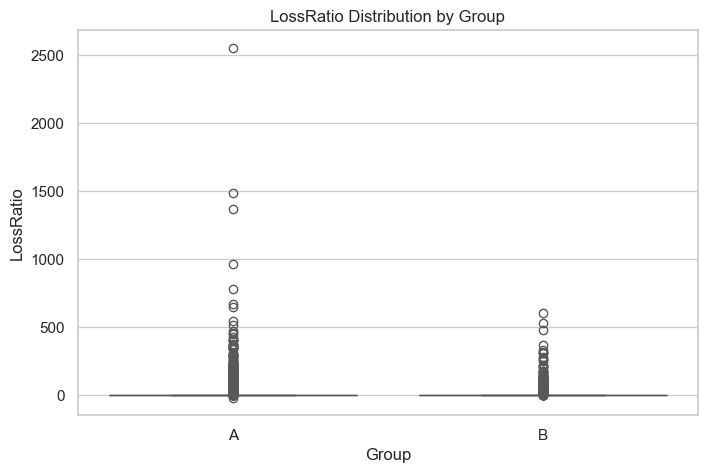

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the groups with labels for visualization
df_plot = pd.concat([group_a.assign(Group='A'), group_b.assign(Group='B')])

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_plot, x='Group', y='LossRatio', palette='Set2')
plt.title('LossRatio Distribution by Group')
plt.show()


In [30]:
# Conduct an independent t-test to compare Margin (profitability) between provinces
t_stat_m, p_val_m = stats.ttest_ind(group_a['Margin'], group_b['Margin'], equal_var=False)

# Display t-statistic and p-value
print(f'Margin - T-statistic: {t_stat_m:.3f}, p-value: {p_val_m:.5f}')


Margin - T-statistic: -1.176, p-value: 0.23945


C:\Users\Bob\AppData\Local\Temp\ipykernel_11392\3411347115.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='Group', y='Margin', palette='coolwarm')


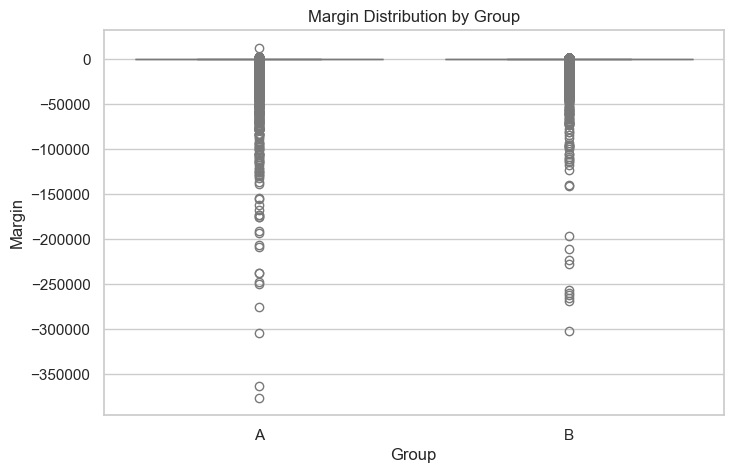

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = pd.concat([group_a.assign(Group='A'), group_b.assign(Group='B')])

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_plot, x='Group', y='Margin', palette='coolwarm')
plt.title('Margin Distribution by Group')
plt.show()


In [31]:
# Create a summary table comparing key metrics across the two provinces
summary = pd.DataFrame({
    'Province': ['Gauteng', 'Western Cape'],
    'Avg LossRatio': [group_a['LossRatio'].mean(), group_b['LossRatio'].mean()],
    'Avg Margin': [group_a['Margin'].mean(), group_b['Margin'].mean()],
    'Claim Frequency': [
        (group_a['TotalClaims'] > 0).mean(),  # % of policies that had claims
        (group_b['TotalClaims'] > 0).mean()
    ]
})

# Display the summary table
summary


,Province,Avg LossRatio,Avg Margin,Claim Frequency
0,Gauteng,0.428927,-16.306879,0.005162
1,Western Cape,0.265328,-2.596777,0.004048


In [33]:
# Create a new binary column: HasClaim = 1 if TotalClaims > 0, else 0
df['HasClaim'] = df['TotalClaims'].apply(lambda x: 1 if x > 0 else 0)


C:\Users\Bob\AppData\Local\Temp\ipykernel_11392\720875026.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='LossRatio', palette='Set2')
C:\Users\Bob\AppData\Local\Temp\ipykernel_11392\720875026.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='HasClaim', palette='pastel')


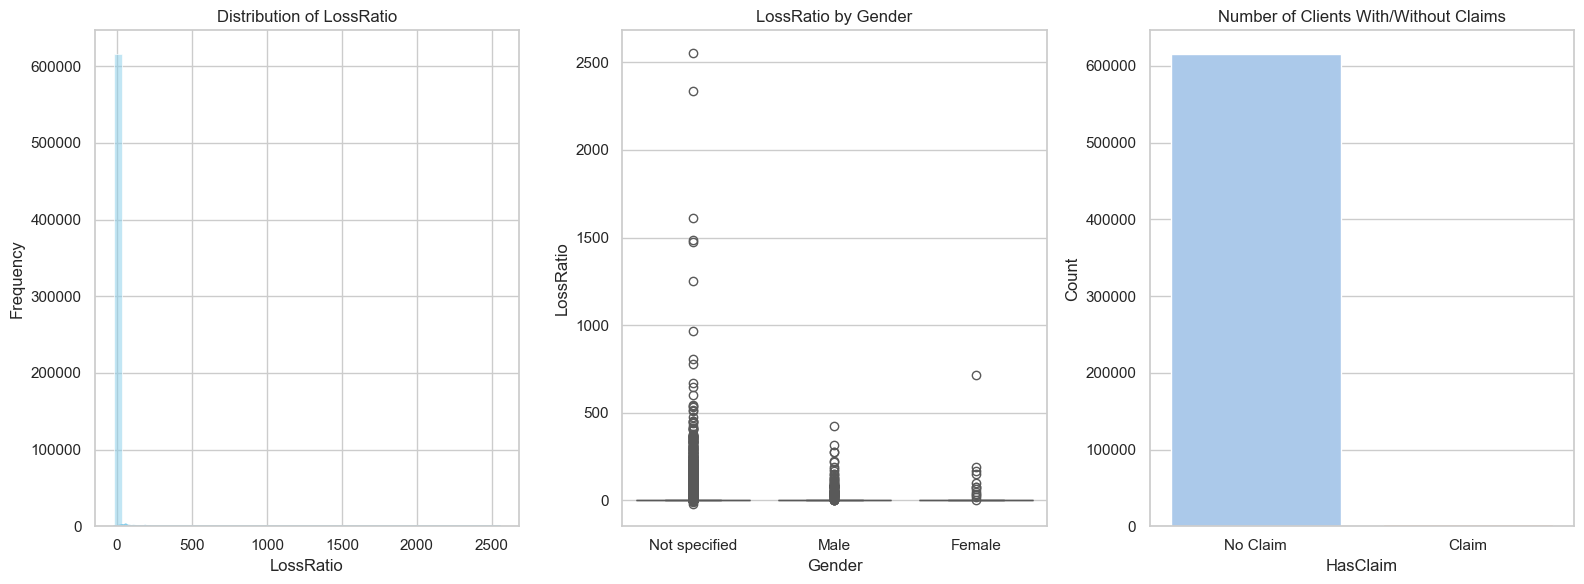

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme
sns.set(style="whitegrid")

# Create a figure with multiple subplots
plt.figure(figsize=(16, 6))

# 1. Histogram of LossRatio
plt.subplot(1, 3, 1)
sns.histplot(df['LossRatio'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of LossRatio')
plt.xlabel('LossRatio')
plt.ylabel('Frequency')

# 2. Boxplot of LossRatio by Gender
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Gender', y='LossRatio', palette='Set2')
plt.title('LossRatio by Gender')
plt.xlabel('Gender')
plt.ylabel('LossRatio')

# 3. Countplot of HasClaim
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='HasClaim', palette='pastel')
plt.title('Number of Clients With/Without Claims')
plt.xlabel('HasClaim')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Claim', 'Claim'])

plt.tight_layout()
plt.show()
